<a href="https://colab.research.google.com/github/Jonc29/DATA-ANALYSIS/blob/main/Sales_Data_Analysis_(Darey_io_miniProject).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# My analysis in this mini project will focus on cleaning, exploring,
# and visualizing a sales dataset to extract meaningful insights
# using python and data visualization libraries.

In [6]:
# i will import the libraries i be needing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
#To load the data_set
df = pd.read_csv("Dataset.csv")
df.head()

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
0,1,2024-04-12,C002,Phone,1,600,642.09
1,2,2024-12-14,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,C017,Monitor,1,200,196.34
3,4,2024-04-16,C005,Phone,3,600,1955.86
4,5,2024-03-12,C017,Laptop,1,1000,1098.19


### To Understand this Data Dimensions

In [8]:
# i start by:
# shape of the data
df.shape

(200, 7)

In [9]:
pd.DataFrame(df.columns)

,0
0,OrderID
1,Date
2,CustomerID
3,Product
4,Quantity
5,Price
6,Total


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


# Task 1: cleaning

### To check the Data Types and Missing Values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     200 non-null    int64  
 1   Date        200 non-null    object 
 2   CustomerID  200 non-null    object 
 3   Product     190 non-null    object 
 4   Quantity    200 non-null    int64  
 5   Price       200 non-null    int64  
 6   Total       194 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 11.1+ KB


In [11]:
df.isna().sum()

,0
OrderID,0
Date,0
CustomerID,0
Product,10
Quantity,0
Price,0
Total,6


### finding out that there is missing value in product and total colums. let me investigate this and find out why

In [12]:
# finding any row with missing value
missing_value = df[df.isna().any(axis=1)]
missing_value

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
6,7,2024-01-21,C017,NaN,1,1000,975.85
22,23,2024-10-03,C002,Laptop,1,1000,NaN
26,27,2024-09-09,C016,NaN,1,1000,1007.96
28,29,2024-12-10,C009,NaN,2,600,1218.60
35,36,2024-06-23,C003,NaN,1,600,591.78
57,58,2024-09-20,C001,NaN,1,600,612.47
62,63,2024-12-25,C009,NaN,2,1000,2108.75
70,71,2024-02-13,C001,NaN,1,100,96.85
108,109,2024-02-10,C019,Headphones,1,100,NaN
139,140,2024-12-17,C018,Phone,1,600,NaN


#### *Looking at Total column that has 6 missing values, finding out that total = price x quantity. i will use it to fill the total column missing values*

In [13]:
df['Total'] = df['Total'].fillna(df['Quantity'] * df['Price'])
df['Total'].isna().sum()

np.int64(0)

#### For Product column, since there is irregular pattern in the total corresponding to the product Row, i consider it best to drop the rows

In [14]:
df = df.dropna(subset=['Product'])

In [15]:
df.isna().sum()

,0
OrderID,0
Date,0
CustomerID,0
Product,0
Quantity,0
Price,0
Total,0


In [16]:
# let me rename the cleaned data
df1 = df
df1.head()

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
0,1,2024-04-12,C002,Phone,1,600,642.09
1,2,2024-12-14,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,C017,Monitor,1,200,196.34
3,4,2024-04-16,C005,Phone,3,600,1955.86
4,5,2024-03-12,C017,Laptop,1,1000,1098.19


#### All the missing values has been taken care of

In [17]:
# To check for duplicates
print(f"the number of duplicate values are: {df.duplicated().sum()}")

the number of duplicate values are: 0


### Basic Statistics & Outliers detection

In [18]:
df1.describe()

,OrderID,Quantity,Price,Total
count,190.000000,190.000000,190.000000,190.000000
mean,101.400000,1.363158,672.105263,922.849842
std,57.234392,0.616965,300.459594,636.221003
min,1.000000,1.000000,100.000000,93.310000
25%,52.250000,1.000000,400.000000,555.872500
50%,102.500000,1.000000,600.000000,823.940000
75%,149.750000,2.000000,1000.000000,1061.065000
max,200.000000,3.000000,1000.000000,3293.240000


In [19]:
# To do filtering for boxplots to detect outliers
numerical_features = df1.select_dtypes(include=['int64', 'float64']).columns
numerical_features

Index(['OrderID', 'Quantity', 'Price', 'Total'], dtype='object')

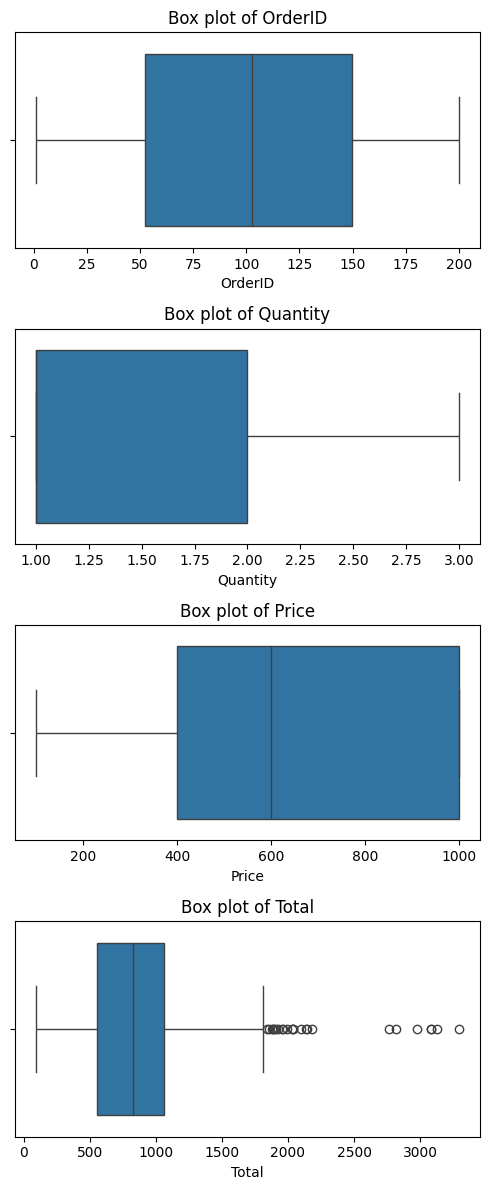

In [20]:
# To plot box plot for the numerical features
plt.figure(figsize=(5,len(numerical_features) *3)) # to adjust to fit

for i, col in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i)
    sns.boxplot(x=df1[col])
    plt.title(f"Box plot of {col}")
    plt.tight_layout()
plt.show()

#### It's seen that the Total column have outliers skewed to the right. then let me handle the outliers

In [21]:
# Handling the outliers
Q1 = df1['Total'].quantile(0.25)
Q3 = df1["Total"].quantile(0.75)
IQR = Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

#data = data.copy()
data = df1[(df1.Total > lower_limit) & (df1.Total < upper_limit)]

data.head()

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
0,1,2024-04-12,C002,Phone,1,600,642.09
2,3,2024-09-27,C017,Monitor,1,200,196.34
4,5,2024-03-12,C017,Laptop,1,1000,1098.19
7,8,2024-04-12,C002,Monitor,2,200,434.12
8,9,2024-05-01,C002,Phone,1,600,626.59


In [22]:
data.shape

(166, 7)

#### I have sucessfully handled the outlier cases which brings our data from 200 to 166 instances

## Task 2: exploring

##### What are the different product category in the Dataset

In [23]:
print(f"Different products includes: {df1['Product'].unique()}")

Different products includes: ['Phone' 'Laptop' 'Monitor' 'Tablet' 'Headphones']


##### To find the total sales made

In [24]:
print(f'The Total sales is: ${data.Total.sum()}')

The Total sales is: $120432.48000000001


##### Are there more orders placed on some specific Days and months?

In [25]:
data["Date"] = pd.to_datetime(data['Date'])
#To map weeks and months for readability
dw_mapping = {0:"monday", 1:"tuesday", 2:"Wednesday", 3:"thursday", 4:"friday", 5:"saturday", 6:"sunday"}
dm_mapping = {1:"jan",2:"feb",3:"march",4:"april",5:"may",6:"june",7:"july",8:"august",9:"september",10:"october",11:"november",12:"december"}

data['days_name'] = data['Date'].dt.weekday.map(dw_mapping)
data['months_name'] = data['Date'].dt.month.map(dm_mapping)

week_days = data.groupby(["days_name"]).agg({"Date": "count"})
month_col = data.groupby(["months_name"]).agg({"Date": "count"})
#To arrange the values in ascendind order
print(week_days['Date'].sort_values(ascending = False))
print()
print(month_col['Date'].sort_values(ascending = False))

days_name
tuesday      30
friday       29
saturday     24
monday       23
Wednesday    23
sunday       21
thursday     16
Name: Date, dtype: int64

months_name
august       24
feb          19
september    15
july         14
may          14
november     13
jan          12
december     12
june         12
october      11
april        10
march        10
Name: Date, dtype: int64


### It's seen that highest sales is made on **Tuesdays** and **friday**
### And highest sales are made on **August** and followed by **February**

In [26]:
#To know the total amount made on each days
day_sales = data.groupby('days_name')['Total'].sum().sort_values(ascending = False)
month_sales = data.groupby('months_name')['Total'].sum().sort_values(ascending = False)
print(month_sales)
day_sales

months_name
august       14725.42
feb          13585.70
may          12531.00
september    11099.46
july         10067.07
march         9652.32
october       8797.95
june          8780.01
november      8720.90
december      8683.87
jan           7779.24
april         6009.54
Name: Total, dtype: float64


,Total
days_name,
tuesday,24432.88
saturday,18071.75
Wednesday,18007.91
friday,17116.73
sunday,15246.74
monday,15153.14
thursday,12403.33


In [27]:
#To print out the maximum sales and month and day it was made
max_day = day_sales.idxmax()
print(f"The Highest sales are made on: {max_day} with the total sales of ${day_sales.max():,.2f}")
print(f"The month with the highest sales is: {month_sales.idxmax()} with the total sales of ${month_sales.max():,.2f}")

The Highest sales are made on: tuesday with the total sales of $24,432.88
The month with the highest sales is: august with the total sales of $14,725.42


In [28]:
#To Know the Product that brings in the Highest amount of money
prod_with_highest_sales = data.groupby("Product")["Total"].max().sort_values(ascending = False)
print(f"The product that brings highest income is: {prod_with_highest_sales.idxmax()} with the sum of: ${prod_with_highest_sales.max()}")



The product that brings highest income is: Phone with the sum of: $1812.4


In [29]:
#To find customer who made the most number of purchases
data.CustomerID.value_counts()
top_cust = data["CustomerID"].value_counts()
purchase_count = data["CustomerID"].value_counts()

top_cust_df = top_cust.head(10).reset_index()
top_cust_df.columns = ['CustomerID', 'purchase_count']

print(f"customer who made the most number of purchases is:{top_cust.idxmax()} with the purchase count of: {purchase_count.max()}")

customer who made the most number of purchases is:C016 with the purchase count of: 14


In [30]:
#Customer who spent the most in total
cust_sales = data.groupby("CustomerID")["Total"].sum()
top_spender = cust_sales.idxmax()
top_spent_amount = cust_sales.max()
print(f"The customer who spend highest is:{top_spender} by the total amount of: ${top_spent_amount}")

# Convert to DataFrame for plotting
cust_sales_df = cust_sales.sort_values(ascending=False).reset_index()
cust_sales_df.columns = ['CustomerID', 'TotalSpent']

The customer who spend highest is:C016 by the total amount of: $9417.89


In [31]:
# Count how many times each customer bought each product
cust_product = data.groupby(['CustomerID', 'Product']).size().unstack(fill_value=0)

## Task 3: visualization

### Here i will visualize
- The month that highest sales are made on
- The Day that customer visit most
- The product that generates highest income
- The customer who made the most number of purchases
- Customer who spent the most in total
- If there is relationship between products and month
- if there is a relationship between customer and products

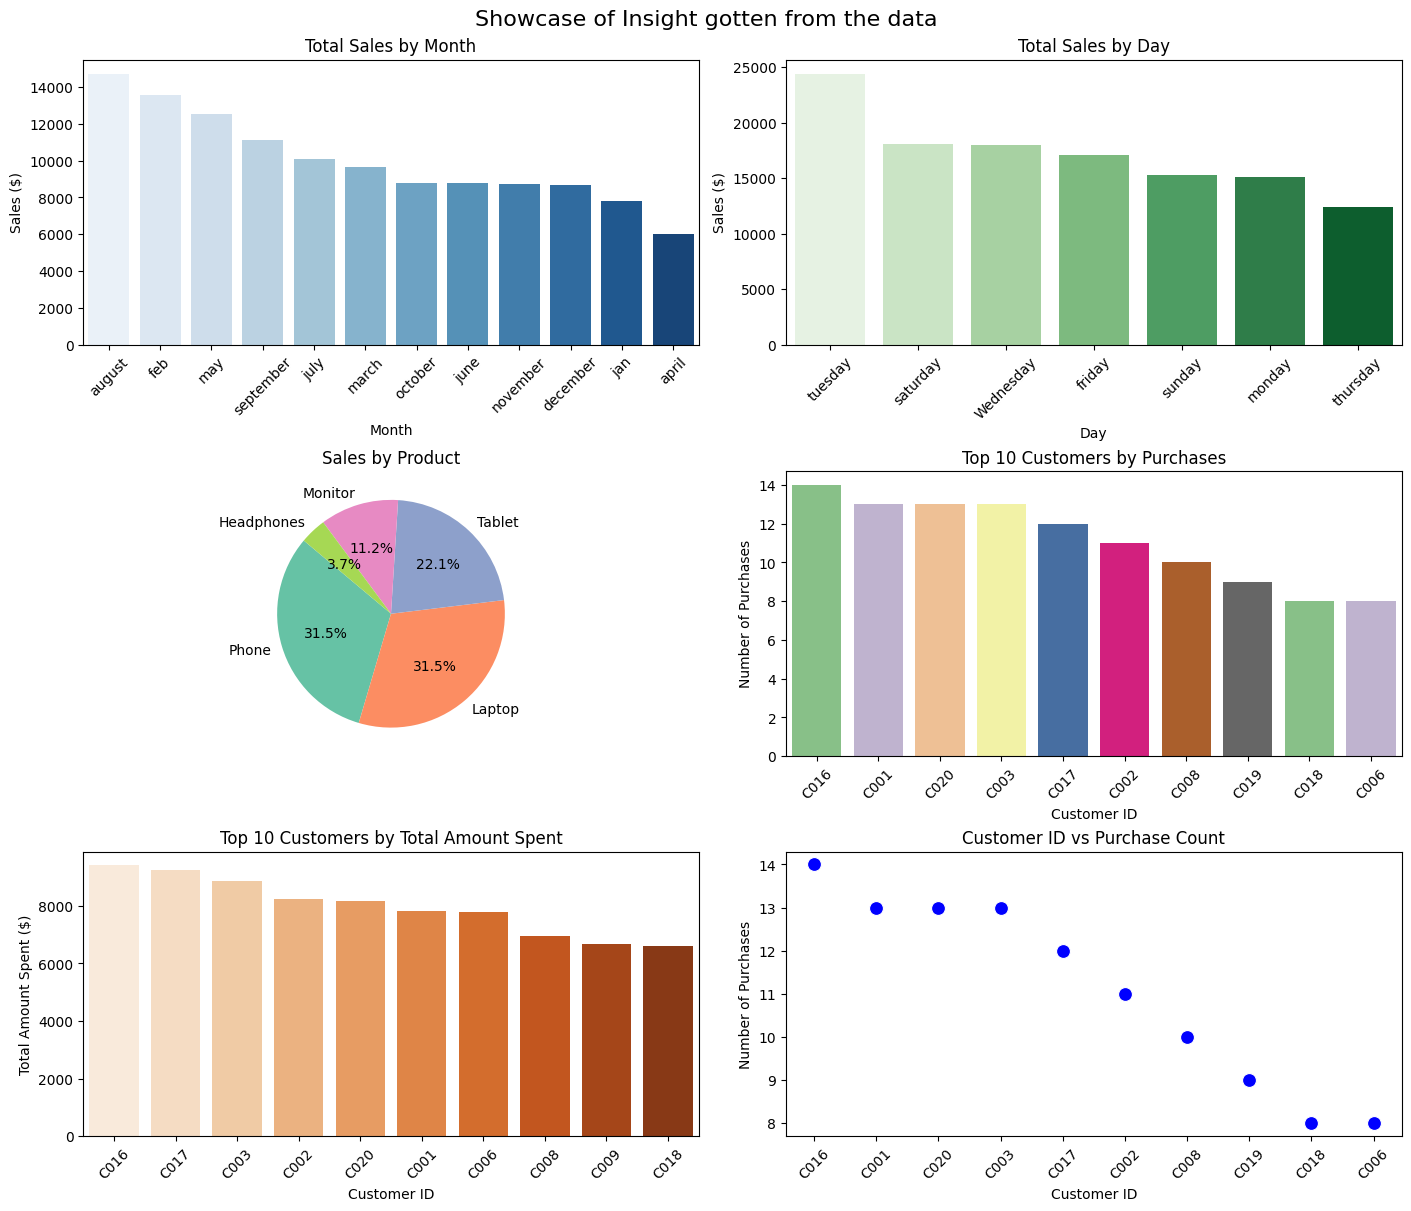

In [32]:
# To create a subplot for all the chart
fig, axs = plt.subplots(3, 2, figsize=(14, 12), constrained_layout=True)
plt.suptitle("Showcase of Insight gotten from the data", fontsize=16)

# Barplot: Total sales by month
sns.barplot(x=month_sales.index, y=month_sales.values, ax=axs[0, 0], palette="Blues")
axs[0, 0].set_title("Total Sales by Month")
axs[0, 0].set_xlabel("Month")
axs[0, 0].set_ylabel("Sales ($)")
axs[0, 0].tick_params(axis='x', rotation=45)

# Barplot: Total sales by day
sns.barplot(x=day_sales.index, y=day_sales.values, ax=axs[0, 1], palette="Greens")
axs[0, 1].set_title("Total Sales by Day")
axs[0, 1].set_xlabel("Day")
axs[0, 1].set_ylabel("Sales ($)")
axs[0, 1].tick_params(axis='x', rotation=45)

# Pie chart: Product with highest sales
axs[1, 0].pie(
    prod_with_highest_sales.values,
    labels=prod_with_highest_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Set2", len(prod_with_highest_sales))
)
axs[1, 0].set_title("Sales by Product")

# Barplot: Top 10 customers by purchases
sns.barplot(data=top_cust_df, x='CustomerID', y='purchase_count', ax=axs[1, 1], palette="Accent")
axs[1, 1].set_title("Top 10 Customers by Purchases")
axs[1, 1].set_xlabel("Customer ID")
axs[1, 1].set_ylabel("Number of Purchases")
axs[1, 1].tick_params(axis='x', rotation=45)

# Barplot: Top 10 customers by total amount spent
sns.barplot(data=cust_sales_df.head(10), x='CustomerID', y='TotalSpent', ax=axs[2, 0], palette="Oranges")
axs[2, 0].set_title("Top 10 Customers by Total Amount Spent")
axs[2, 0].set_xlabel("Customer ID")
axs[2, 0].set_ylabel("Total Amount Spent ($)")
axs[2, 0].tick_params(axis='x', rotation=45)

# Scatterplot: CustomerID vs Purchase Count
sns.scatterplot(data=top_cust_df, x='CustomerID', y='purchase_count', ax=axs[2, 1], color="blue", s=100)
axs[2, 1].set_title("Customer ID vs Purchase Count")
axs[2, 1].set_xlabel("Customer ID")
axs[2, 1].set_ylabel("Number of Purchases")
axs[2, 1].tick_params(axis='x', rotation=45)

plt.show()

In [34]:
plt.savefig("sales_insights_chart.jpg", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>